<a href="https://colab.research.google.com/github/ssubbinn/study/blob/main/%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 차원 축소 개요

차원 축소 : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성

- 차원이 줄어들면 예측 신뢰도 높아짐, 다중 공선성 문제도 해결가능, 시각화 하기에도 좋음

- 차원 축소는 피처 선택, 피처 추출로 나뉨

피처 선택: 특정 피처에 종속성이 강한 불필요한 피처 제거, 데이터의 특징을 잘 나타내는 주요 피처만 선택

피처 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출, 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값
-> 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑 후 추

- 이미지 데이터에서도 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행 가능


### 2. PCA

: 가장 대표적인 차원 축소 기법. 여러 변수 간에 존재하는 상관관례를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법

- **가장 높은 분산**을 가지는 데이터의 축을 찾아 이 축으로 차원 축소 -> PCA의 주성분

1. 가장 큰 데이터 변동성을 기반으로 첫 번째 축을 생성
2. 이 벡터 축에 직각이 되는 벡터를 축으로 두번째 축 생성
3. 세번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축 생성

[선형 대수 관점]

입력 데이터의 공분산 행렬을 고유값 분해, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환 -> 이 고유벡터가 PCA의 주성분 벡터

선형 변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환

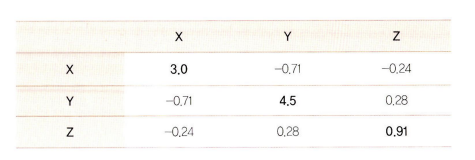

- 고유 벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
- 고유값 : 고유 벡터의 크기


PCA의 수행 스텝

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 순으로 K만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환



In [ ]:
#iris 데이터로 예시

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


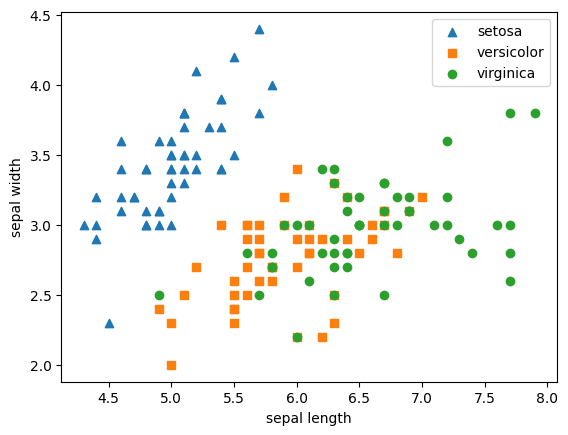

In [ ]:
#sepal length와 sepal width를 X축, Y축으로 해서 품종 데이터 분포

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시

for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
#2차원 시각화 위한 스케일링

from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성값을 스케일링
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


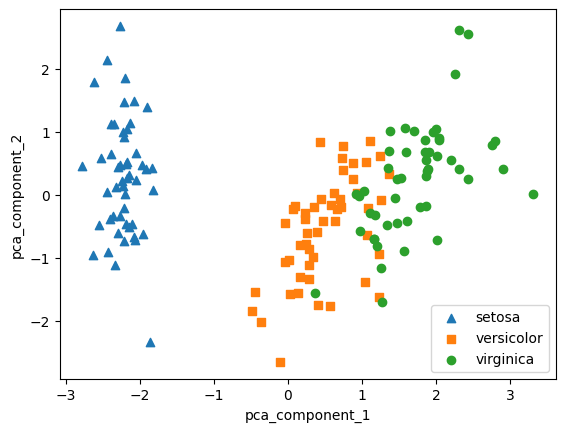

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

setosa가 비교적 잘 분류됨

In [ ]:
print(pca.explained_variance_ratio_)
#1번이 73%변동성
#2번이 23%변동성

[0.72962445 0.22850762]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('pca 변환 데이터 교차 검증 개별 정확도:',scores)
print('pca 변환 데이터 평균 정확도:',np.mean(scores))